In [314]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("plot.R", local = T)
source("Cbind.R", local = T)

In [315]:
data <- data.table::fread(file = "tidy_data_wide.csv")


In [316]:
table(data$Training)


       1X 6X_Massed 6X_Spaced 
      248        20       273 

In [352]:
experiments <- c("24hr LTM", "24hr LTM CHX", "20min STM")
genotypes <- c("Iso31", "orb2")
wild_types <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")

data <- data[
    (experiment %in% c("24hr LTM", "24hr LTM CHX") & Genotype %in% wild_types & Training == "6X_Spaced") |
    (Genotype %in% "orb2"),]

data <-data[interval=="NONE",]
data <- data[Files %in% unique(grep(x=Files, pattern="SD", invert=TRUE, value = TRUE)),]

# data[Genotype != "orb2", Genotype:="Iso31"]
data[, Group := paste(experiment, ifelse(Genotype=="orb2", "orb2", "Iso31"), sep="-")]

panel3_data<-data

In [353]:
data$interval

[1] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [11] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [21] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [31] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [41] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [51] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [61] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [71] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [81] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
 [91] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[101] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[111] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[121] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[131] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[141] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[151] "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE" "NONE"
[161] "NONE"

In [354]:
panel3_data_long <- melt(panel3_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

In [355]:
table(panel3_data$Genotype)


                        Iso31 MB010B.(II)SPARC-Chrimson ISO 
                           81                            41 
                         orb2 
                           39 

In [356]:
A <- panel3_data[experiment=="24hr LTM" & Genotype %in% wild_types ,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
B <- panel3_data[experiment=="24hr LTM CHX" & Genotype %in% wild_types,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
C <- panel3_data[experiment=="24hr LTM" & Genotype == "orb2",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
D <- panel3_data[experiment=="20min STM" & Genotype == "orb2",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
Cd <- C[, (delta = POST-PRE)]
Dd <- D[, (delta = POST-PRE)]
X<-Cbind(Ad, Bd, Cd, Dd)
colnames(X) <- c("24hr LTM", "24hr LTM CHX", "24hr LTM orb2", "20min STM orb2")

In [357]:
print(paste(
    nrow(A),
    nrow(B),
    nrow(C),
    nrow(D)  
))

[1] "63 59 20 19"


In [358]:
data.table::fwrite(x = A, file="prism/Figure_3_24hr LTM.csv")
data.table::fwrite(x = B, file="prism/Figure_3_24hr LTM CHX.csv")
data.table::fwrite(x = C, file="prism/Figure_3_24hr LTM orb2.csv")
data.table::fwrite(x = D, file="prism/Figure_3_20min STM orb2.csv")
data.table::fwrite(x = X, file="prism/Figure_3_boxplot.csv")

In [359]:
sort(table(panel3_data$Files))


                         2021-10-05 (CH) 
                                       1 
                         2021-11-28 (CH) 
                                       1 
                         2021-12-03 (CH) 
                                       2 
                        2021-12-22 (CH1) 
                                       2 
                        2021-10-06 (CH1) 
                                       3 
                         2021-10-07 (CH) 
                                       3 
                        2021-11-01 (CH1) 
                                       4 
                        2021-11-27 (CH1) 
                                       4 
                         2021-11-30 (CH) 
                                       4 
                         2021-12-05 (CH) 
                                       4 
                         2021-12-08 (CH) 
                                       4 
                         2021-12-17 (CH) 
                                 

In [360]:
panel3_data_long$Group <- factor(panel3_data_long$Group, levels=c("24hr LTM-Iso31", "24hr LTM CHX-Iso31", "24hr LTM-orb2", "20min STM-orb2"))

In [361]:
table(panel3_data_long$Group)/2


    24hr LTM-Iso31 24hr LTM CHX-Iso31      24hr LTM-orb2     20min STM-orb2 
                63                 59                 20                 19 

[1] -1.02  1.02


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 4

$direction
[1] "horizontal"


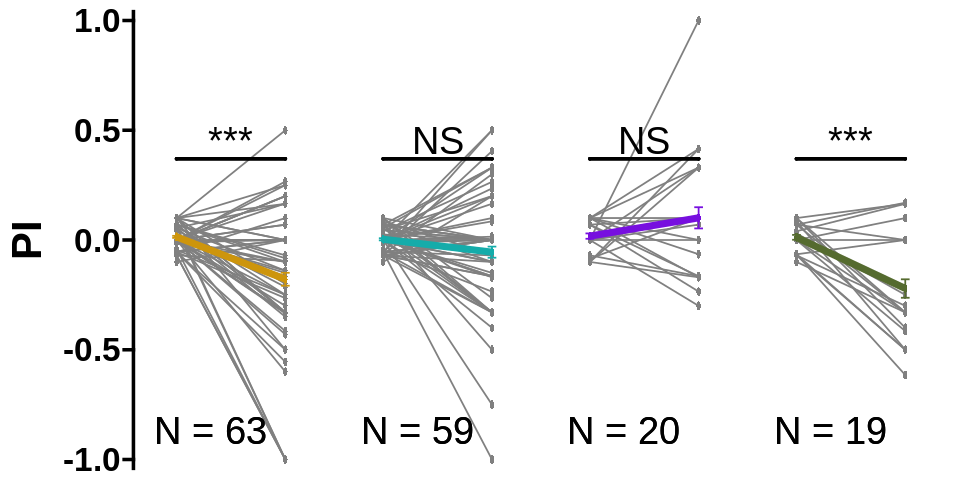

In [362]:
size_unit=2
ratio=2
panel3A <- learning_plot(
    panel3_data_long, "Group", y_limits=c(-1, .7),
    hjust_text = 0.2, textsize = 8, starsize=8,
    y_annotation = 0.37,
    colors=colors_panel3
)
save_learning_plot(plot=panel3A, filename = "figures/panel3.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.width=size_unit*panel3A$n_facets, repr.plot.height=size_unit*ratio)
panel3A

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 4


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

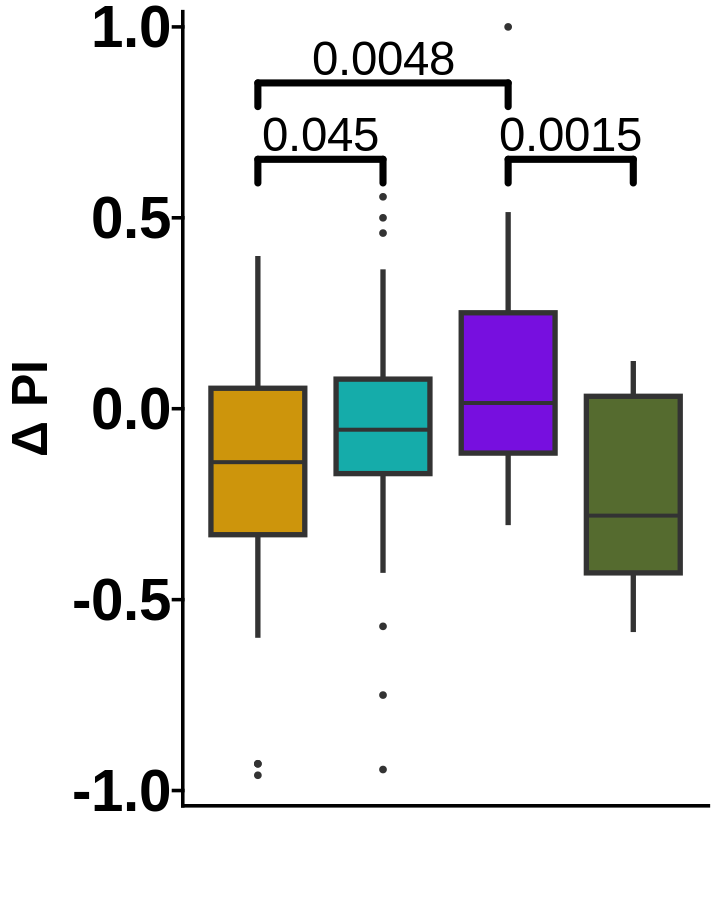

In [364]:
size_unit=1.5
ratio=5

panel3B <- summary_plot(
    panel3_data_long,
    "Group",
    comparisons=list(
        c("24hr LTM-Iso31", "24hr LTM CHX-Iso31"),
        c("24hr LTM-Iso31", "24hr LTM-orb2"),
        c("24hr LTM-orb2", "20min STM-orb2")        
    ),
    annotation_y=c(.55, .75, .55),
    test=unpaired_t_test,
    map_signif_level=FALSE,
    y_limits=c(-1, 1),
    text_y_size=35,
    title_y_size=30,
    starsize=10,
    colors=colors_panel3
)
panel3B$gg <- panel3B$gg + theme(
    axis.ticks.x = element_blank(), axis.text.x = element_blank(),
)
#scale_y_continuous(breaks = seq(-1, 0.5, 0.5), limits=c(-1, 0.5))
options(repr.plot.width=size_unit*panel3B$n_facets, repr.plot.height=size_unit*ratio)
panel3B
save_summ_plot(plot=panel3B, filename = "figures/panel3B.svg", size_unit=size_unit, ratio=ratio)